In [1]:
# What is the application and its aims 
## My application aims to predict how the stock market would behave. By understanding this aspect, it was expected to aid in 
## buy and sell of stocks, in particular in my case I have used a stock index SP500. I got the data from Yahoo finance. Therefore
## by understanding the movement I tried to gain an understanding of whether it would be worht while to purhcase or not. 
## Once the model aims to help individuals get a sense of how much they stand to gain if they would purchase or sell. 


## I used two modeling techniques ; Random Forest and Multiple Linear Regression. 

# Aspects need to be looked into
#The acuracy could be made better which needs to be ooked into.


import pandas as pd
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")


In [3]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


In [ ]:
# Price on a training day. Use these columns to predict if stock price will go up or down tomm

<AxesSubplot:xlabel='Date'>

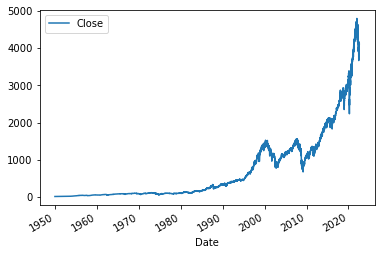

In [4]:
sp500.plot.line(y="Close", use_index = True)

In [5]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [6]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,2520000


In [ ]:
## We care more about the directionality, will the stock go up or down? So trying to prodict  on days that the stock will go up,
##so if we choose to buy the stock then we know we can buy it as the price will go up. 
## Thus a variable called  'Target' is created indicating if the stock will go up or down the next day.
## So on days that the stock actually goes up can we predict that the stock goes up. So traget is our major variable

In [ ]:
## Start by creating a column called tomorrow, which is basically the next days price if the stock will go up tomorrow or not

In [7]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [60]:
sp500.index = pd.to_datetime(sp500.index)

In [61]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-07-26,3953.219971,3953.219971,3910.739990,3921.050049,3083420000,4023.610107,1
2022-07-27,3951.429932,4039.560059,3951.429932,4023.610107,3584170000,4072.429932,1
2022-07-28,4026.129883,4078.949951,3992.969971,4072.429932,3882850000,4130.290039,1


In [ ]:
##Column showing tomorrow's price

In [ ]:
## Now set up target, that is what is going to be predicted with Machine learning

In [15]:
## Basically indicates if tomorrows price is greater than the present day price

sp500["Target"] = (sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [17]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,16.850000,1
1950-01-04,16.85,16.85,16.85,16.85,1890000,16.930000,1
1950-01-05,16.93,16.93,16.93,16.93,2550000,16.980000,1
1950-01-06,16.98,16.98,16.98,16.98,2010000,17.080000,1
1950-01-09,17.08,17.08,17.08,17.08,2520000,17.030001,0


In [ ]:
# 1 when tomorrow's price is greater than the present day price and 0 other wise

In [18]:
x = sp500[["Close", "Volume", "Open", "High", "Low"]]

In [19]:
y=sp500[["Target"]]

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=0)


In [21]:
print ('Train set', x_train.shape,  y_train.shape)

Train set (12784, 5) (12784, 1)


In [22]:
print ('Test set', x_test.shape,  y_test.shape)

Test set (5479, 5) (5479, 1)


In [104]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=0)
model.fit(x_train,y_train)

C:\Users\SHALLAKA\AppData\Local\Temp/ipykernel_8364/1169277872.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier(min_samples_split=100, random_state=0)

In [105]:
model.predict(x_test)

array([0, 1, 0, ..., 1, 1, 0])

In [106]:
from sklearn import metrics


In [107]:
def get_accuracy(x_train, x_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(x_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(x_train))}

In [30]:
print(get_accuracy(x_train, x_test, y_train, y_test,model))

{'test Accuracy': 0.5256433655776601, 'train Accuracy': 0.7441332916145181}


In [167]:
horizons = [2,5,60,250,100]

In [168]:
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    # creating columns
    ratio_column = f"Close_Ratio_{horizon}"
    #adding to sp500 data frame
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    #basically todays close /average close in the last two days, 5 days,..
    
    
    new_predictors+= [ratio_column]

In [169]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_100
Date,,,,,,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1,NaN,NaN,NaN,NaN,NaN
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1,1.005670,NaN,NaN,NaN,NaN
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1,1.002368,NaN,NaN,NaN,NaN
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1,1.001474,NaN,NaN,NaN,NaN
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0,1.002936,1.010651,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26,3953.219971,3953.219971,3910.739990,3921.050049,3083420000,4023.610107,1,0.994195,0.989746,0.993234,0.897667,0.949715
2022-07-27,3951.429932,4039.560059,3951.429932,4023.610107,3584170000,4072.429932,1,1.012909,1.012378,1.019680,0.921480,0.975359
2022-07-28,4026.129883,4078.949951,3992.969971,4072.429932,3882850000,4130.290039,1,1.006030,1.020886,1.032413,0.932937,0.987807


In [170]:
sp500.dropna()  

#remove missing rows

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_100
Date,,,,,,,,,,,,
1951-01-02,20.770000,20.770000,20.770000,20.770000,3030000,20.690001,0,1.008252,1.020138,1.047799,1.128390,1.068504
1951-01-03,20.690001,20.690001,20.690001,20.690001,3370000,20.870001,1,0.998070,1.008580,1.043158,1.123060,1.063168
1951-01-04,20.870001,20.870001,20.870001,20.870001,3390000,20.870001,0,1.004331,1.011732,1.051368,1.131843,1.071174
1951-01-05,20.870001,20.870001,20.870001,20.870001,3390000,21.000000,1,1.000000,1.006948,1.050706,1.130876,1.069861
1951-01-08,21.000000,21.000000,21.000000,21.000000,2780000,21.120001,1,1.003105,1.007678,1.056365,1.136930,1.075027
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,3965.719971,3975.300049,3943.459961,3966.840088,2988650000,3921.050049,0,1.000657,1.000514,1.003281,0.907751,0.959724
2022-07-26,3953.219971,3953.219971,3910.739990,3921.050049,3083420000,4023.610107,1,0.994195,0.989746,0.993234,0.897667,0.949715
2022-07-27,3951.429932,4039.560059,3951.429932,4023.610107,3584170000,4072.429932,1,1.012909,1.012378,1.019680,0.921480,0.975359


In [181]:
model = RandomForestClassifier(n_estimators=800, min_samples_split=200, random_state=0)
model.fit(x_train,y_train)

C:\Users\SHALLAKA\AppData\Local\Temp/ipykernel_8364/3545649535.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier(min_samples_split=200, n_estimators=800, random_state=0)

In [182]:
print(get_accuracy(x_train, x_test, y_train, y_test,model))

{'test Accuracy': 0.5369592991421792, 'train Accuracy': 0.7001720901126408}


In [163]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [164]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [[-2.33011593e-03  6.76604665e-12  1.50303765e-04  4.82878984e-04
   1.69735392e-03]]
LR Intercept: 
 [0.52863349]


In [166]:
print("Performance (R^2): ", lr.score(x_train, y_train))

Performance (R^2):  0.001402764632526532
